# **Modelos ARIMA**
- **AR (p) - Auto Regressivo:** $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... \phi_p y_{t-p} + e_t$
- **MA (q) - Média Móvel:** $y_t = c  + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... \theta_q y_{t-q}$
- **ARIMA (p,d,q):** $y^{'}_t = c + \phi_1 y^{'}_{t-1} + \phi_2 y^{'}_{t-2} + ... \phi_p y^{'}_{t-p} + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... \theta_q y_{t-q} + e_t$

sendo que $p$ é a ordem do modelos **AR**, $q$ é a ordem do modelo **MA**, e $d$ é o grau de diferenciação.

# **Meteorologia com dados do Instituto Nacional de Meteorologia - INMET**

## **Pré-Processamento**

### **Preparando o ambiente**

In [1]:
#Instalando biblioteca necessária
#!pip install pmdarima

In [2]:
# Importando biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima


### **Carregando o conjunto de dados**

In [3]:
# Importando o conjunto de dados

file = 'https://raw.githubusercontent.com/rogeriodelfim/Dataset/main/inmet/inmet_Salvador_A401_mensal.csv'
inmet = pd.read_csv(
    filepath_or_buffer = file, 
    sep=';',
    decimal='.'
)

In [4]:
# Espiando o conjunto de dados
inmet

,data,precipitacao_total,temperatura_media
0,2010-01-31,86.4,27.229741
1,2010-02-28,13.2,28.158036
2,2010-03-31,56.0,27.552285
3,2010-04-30,21.4,25.963750
4,2010-05-31,247.0,25.631586
...,...,...,...
139,2021-08-31,178.6,23.542070
140,2021-09-30,37.4,25.024444
141,2021-10-31,144.4,26.186425
142,2021-11-30,304.0,26.081111


In [5]:
# Espiando a estrutura conjunto de dados
inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   data                144 non-null    object 
 1   precipitacao_total  132 non-null    float64
 2   temperatura_media   140 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


### **Transformando o conjunto de dados**

In [6]:
# Transformando data em formato datetime
inmet['data'] = pd.to_datetime(inmet['data'])

# Criando a variavel mês
inmet['mes'] = inmet['data'].dt.month

# Espiando a estrutura conjunto de dados
inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data                144 non-null    datetime64[ns]
 1   precipitacao_total  132 non-null    float64       
 2   temperatura_media   140 non-null    float64       
 3   mes                 144 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 4.6 KB


In [7]:
# Espiando o conjunto de dados
inmet.head(50)

,data,precipitacao_total,temperatura_media,mes
0,2010-01-31,86.4,27.229741,1
1,2010-02-28,13.2,28.158036,2
2,2010-03-31,56.0,27.552285,3
3,2010-04-30,21.4,25.963750,4
4,2010-05-31,247.0,25.631586,5
...,...,...,...,...
45,2013-10-31,219.4,25.149328,10
46,2013-11-30,212.8,25.494306,11
47,2013-12-31,156.2,26.098558,12
48,2014-01-31,NaN,26.508096,1


In [8]:
# Inputando valores ausentes de precipitacao_total pela média dos meses
inmet['precipitacao_total'].fillna(
      inmet\
        .groupby(["mes"])["precipitacao_total"]\
        .transform(np.mean)\
        .round(1), 
      inplace=True
)

# Inputando valores ausentes de temperatura_media pela média dos meses
inmet['temperatura_media'].fillna(
      inmet\
        .groupby(["mes"])["temperatura_media"]\
        .transform(np.mean),\
        #.round(1), 
      inplace=True
)

In [9]:
# Espiando o conjunto de dados
inmet.head(50)

,data,precipitacao_total,temperatura_media,mes
0,2010-01-31,86.4,27.229741,1
1,2010-02-28,13.2,28.158036,2
2,2010-03-31,56.0,27.552285,3
3,2010-04-30,21.4,25.963750,4
4,2010-05-31,247.0,25.631586,5
...,...,...,...,...
45,2013-10-31,219.4,25.149328,10
46,2013-11-30,212.8,25.494306,11
47,2013-12-31,156.2,26.098558,12
48,2014-01-31,77.3,26.508096,1


In [10]:
# Selecionando somente Temperatura Média
# Colocando data como índice
inmet= inmet[['data','temperatura_media']].set_index('data')

In [11]:
# Alterando o tipo do índice para DatetimeIndex com frequência mensal
inmet.index = pd.DatetimeIndex(inmet.index ,freq='M')

# Verificando o tipo do índice do dataframe
inmet.index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', name='data', length=144, freq='M')

In [12]:
# Espiando o dataset
inmet.head()

,temperatura_media
data,
2010-01-31,27.229741
2010-02-28,28.158036
2010-03-31,27.552285
2010-04-30,25.963750
2010-05-31,25.631586


In [13]:
# Criando a  Serie temporal
st_inmet = pd.Series(
    data = inmet['temperatura_media'].values, 
    index = inmet.index
)

# Espiando o resultado
st_inmet

data
2010-01-31    27.229741
2010-02-28    28.158036
2010-03-31    27.552285
2010-04-30    25.963750
2010-05-31    25.631586
                ...    
2021-08-31    23.542070
2021-09-30    25.024444
2021-10-31    26.186425
2021-11-30    26.081111
2021-12-31    26.300000
Freq: M, Length: 144, dtype: float64

### **Dividindo a série entre treino e teste**

In [14]:
# Criando a  Serie temporal de treino
st_inmet_treino = pd.Series(
    data = inmet.query('data<="2020-12-31"').temperatura_media.values, 
    index = inmet.query('data<="2020-12-31"').index
)

# Espiando o resultado
st_inmet_treino

data
2010-01-31    27.229741
2010-02-28    28.158036
2010-03-31    27.552285
2010-04-30    25.963750
2010-05-31    25.631586
                ...    
2020-08-31    24.040591
2020-09-30    24.634722
2020-10-31    26.146640
2020-11-30    25.910139
2020-12-31    26.777016
Freq: M, Length: 132, dtype: float64

In [15]:
# Criando a  Serie temporal de teste
st_inmet_teste = pd.Series(
    data = inmet.query('data>"2020-12-31"').temperatura_media.values, 
    index = inmet.query('data>"2020-12-31"').index
)

# Espiando o resultado
st_inmet_teste

data
2021-01-31    26.683602
2021-02-28    27.124405
2021-03-31    27.018817
2021-04-30    26.083750
2021-05-31    25.184274
2021-06-30    24.450833
2021-07-31    23.555108
2021-08-31    23.542070
2021-09-30    25.024444
2021-10-31    26.186425
2021-11-30    26.081111
2021-12-31    26.300000
Freq: M, dtype: float64

## **Análise Exploratória**

### **Visualização da Série**

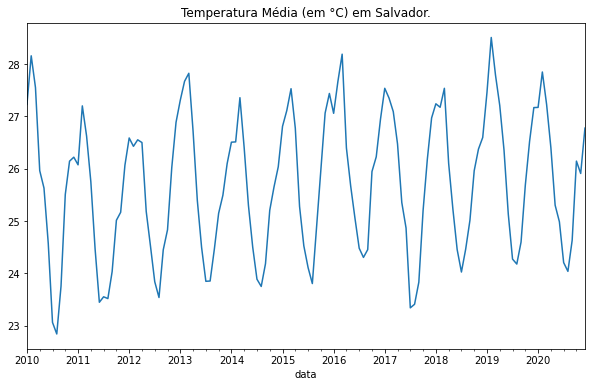

In [17]:
# Gerando o gráfico
st_inmet_treino.plot(
    title = 'Temperatura Média (em °C) em Salvador.',
    figsize =(10, 6)
)

# Exibindo o gráfico
plt.show()

### **Decomposição da série - Modelo aditivo**

In [18]:
# Decompondo a série
decomposicao = seasonal_decompose(st_inmet_treino)

In [19]:
# Decompondo a série - com missing preenchidos pela média
decomposicao = seasonal_decompose(
    x = st_inmet_treino, 
    model='additive', 
    #freq = 12
)

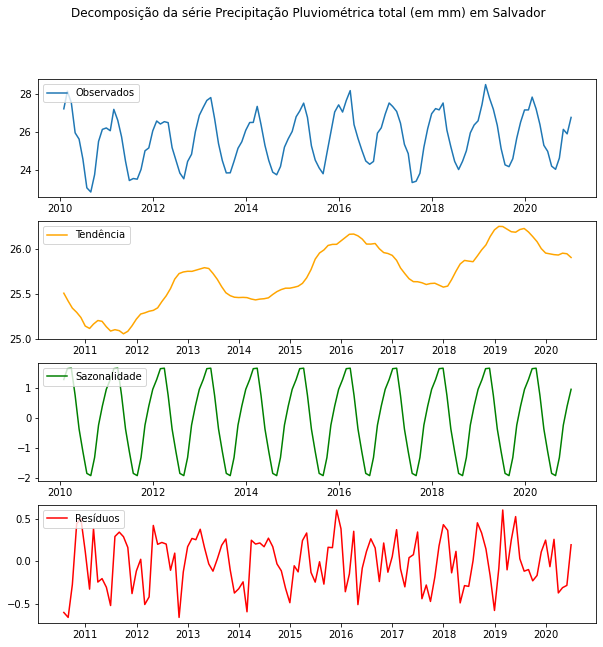

In [21]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao.trend, color = 'orange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao.seasonal, color = 'green', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao.resid, color = 'red', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série Precipitação Pluviométrica total (em mm) em Salvador');

# Exibindo o gráfico
plt.show()

### **Teste de estacionaridade - (Dickey Fuller)**

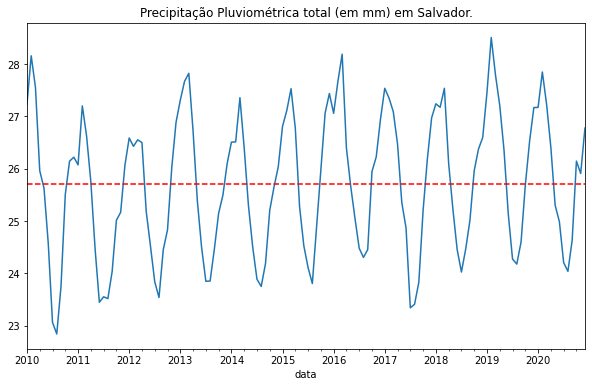

In [22]:
# Gerando o gráfico
st_inmet_treino.plot(
    title = 'Precipitação Pluviométrica total (em mm) em Salvador.',
    figsize =(10, 6)
)

# Inserindo uma linha horizontal com a média dos dados
plt.axhline (y=st_inmet_treino.mean(), color = 'red', linestyle = '--')

# Exibindo o gráfico
plt.show()

- **Hipótese nula (Ho):** a série *não é estacionária*
- **Hipótese Alternativa (Ha):** a série *é estacionária*

In [23]:
# Calculando as medidas do teste Dickey Fuller
df = statsmodels.tsa.stattools.adfuller(st_inmet_treino)

print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p-valor do teste: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -1.4468
p-valor do teste: 0.55962265
Valores Críticos:
1%: -3.4856
5%: -2.8857
10%: -2.5797


Como a estatística do teste é maior que o valor crítico podemos considerar que NÃO existem evidências suficientes para rejeitar a hipótese nula, ou seja, a nível de 1% de significância NÃO existem evidências de que a série é estacionária.

### **Diferenciação**

Uma estratégia para tornar uma série estacionária é fazer a diferenciação $y^{'}_t=y_t - y_{t-1}$, também chamada de série diferenciada de primeira ordem. Caso a série não se torne estacionária, pode diferenciar novamente até encontrar o **d** (grau de diferenciação) ótimo.

In [24]:
# Encontrando a diferença de primeira ordem
st_inmet_treino_1_dif = st_inmet_treino.diff()

# Retirando o NA gerado pela falta de valores antes da primeira observação
st_inmet_treino_1_dif.dropna(inplace = True)

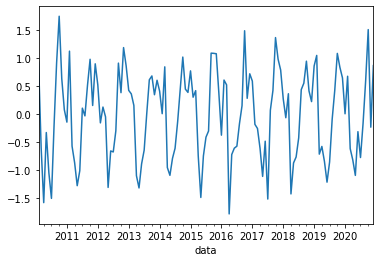

In [25]:
# Gerando o gráfico
st_inmet_treino_1_dif.plot()
plt.show()

In [26]:
# Calculando as medidas do teste Dickey Fuller
# **Hipótese nula (Ho):** a série *não é estacionária*
# **Hipótese Alternativa (Ha):** a série *é estacionária*
df = statsmodels.tsa.stattools.adfuller(st_inmet_treino_1_dif)

print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p-valor do teste: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -10.2309
p-valor do teste: 0.00000000
Valores Críticos:
1%: -3.4856
5%: -2.8857
10%: -2.5797


Como a estísica é menor que os valores críticos e também o p-valor é proximo de zero existeme evidências para rejeitar a hipótese nula, ou seja, existem evidências de que a série diferenciada é estacionária.

### **Auto Correlação da série diferenciada**

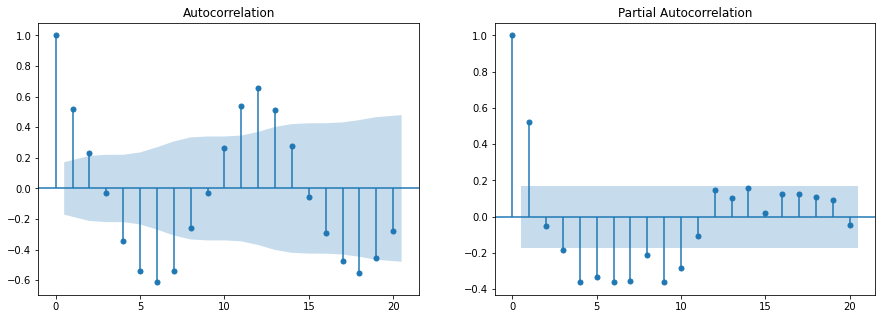

In [28]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(st_inmet_treino_1_dif, lags=20, ax=ax[0])
plot_pacf(st_inmet_treino_1_dif, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

## **Modelos Box-Jenkins das série original**

### **Modelo AR(1)**

Um modelo ARIMA (p,d,q) com a ordem da média móvel e o grau de diferenciação iguais a zero temos ARIMA(p,0,0) resulta em um modelo auto regressivo de ordem p: AR(p).

In [29]:
# Definindo Ajustando um modelo AR(1) = ARIMA(1,0,0)
modelo_ar_1 = ARIMA(st_inmet_treino, order = (1,0,0))

In [30]:
# Ajustando o modelo e guardando os resultado em um objeto
resultado_ar_1 = modelo_ar_1.fit()

In [31]:
# Pegando os resíduos do modelo
residuos_ar_1 = resultado_ar_1.resid

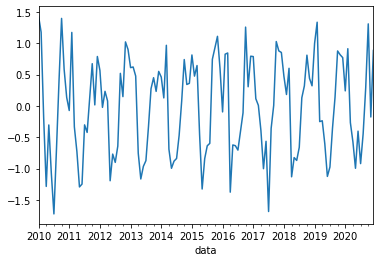

In [32]:
# Visualizando os resíduos
residuos_ar_1.plot()
plt.show()

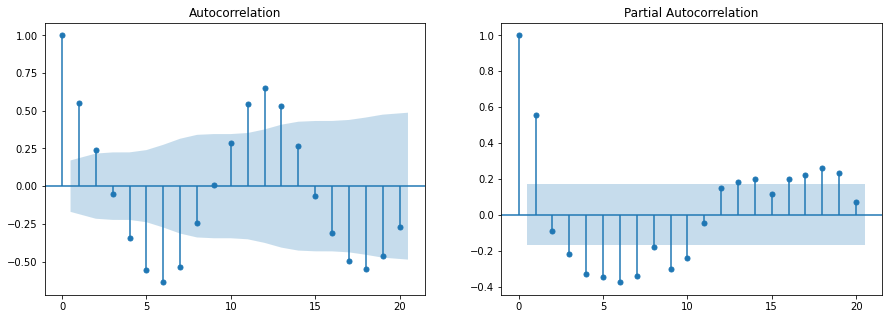

In [34]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_ar_1, lags=20, ax=ax[0])
plot_pacf(residuos_ar_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

C:\Users\roger\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


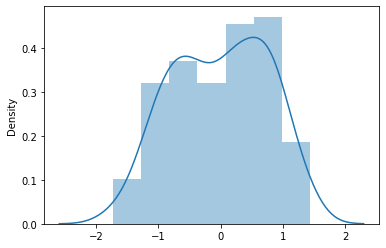

In [36]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_ar_1);

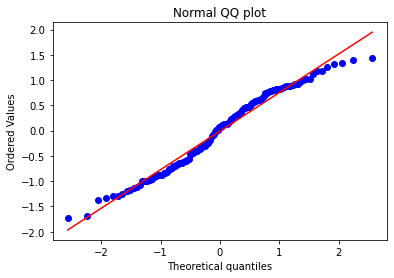

In [38]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_ar_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

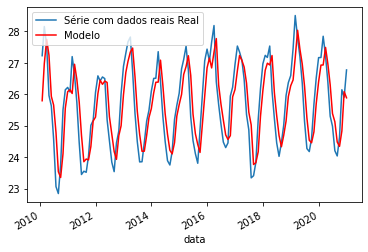

In [41]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_inmet_treino, label='Série com dados reais Real')
resultado_ar_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='upper left')
plt.show()

### **Modelo MA(1)**

Um modelo ARIMA (p,d,q) com a ordem da auto regressivo e o grau de diferenciação iguais a zero temos ARIMA(0,0,q) resulta em um modelo de média móvel de ordem q: MA(q). 

d:\virtualenv\kaggle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


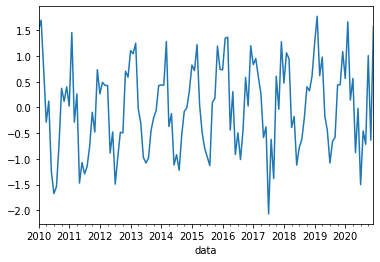

In [43]:
# Definindo Ajustando um modelo MA(1) = ARIMA(0,0,1)
modelo_ma_1 = ARIMA(st_inmet_treino, order = (0,0,1))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_ma_1 = modelo_ma_1.fit()

# Pegando os resíduos do modelo
residuos_ma_1 = resultado_ma_1.resid

# Visualizando os resíduos
residuos_ma_1.plot()
plt.show()

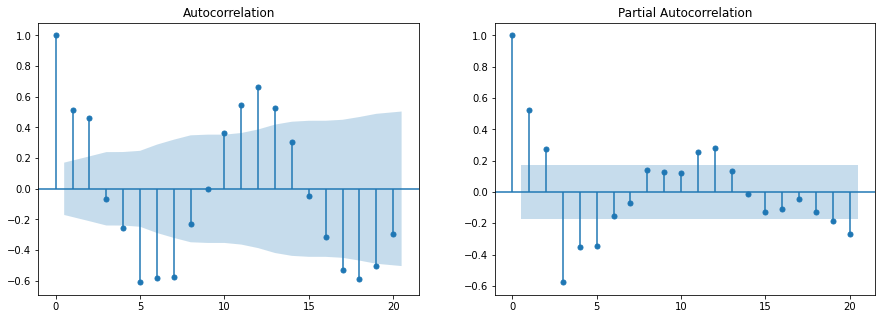

In [44]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_ma_1, lags=20, ax=ax[0])
plot_pacf(residuos_ma_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

C:\Users\roger\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


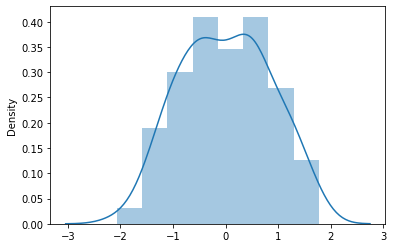

In [46]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_ma_1);

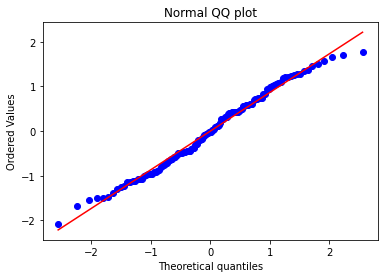

In [47]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_ma_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

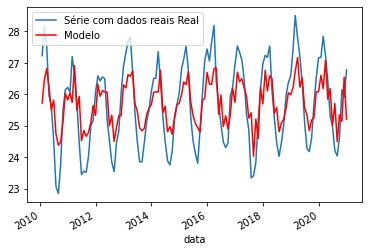

In [48]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_inmet_treino, label='Série com dados reais Real')
resultado_ma_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='upper left')
plt.show()

### **Modelo ARMA(1,1)**

Um modelo ARIMA (p,d,q) com o grau de diferenciação igual a zero temos ARIMA(p,0,q) resulta em um modelo Auto regressivo e de média móvel de ordem p,q: ARMA(p,q). 

In [49]:
# Definindo Ajustando um modelo ARMA(1,1) = ARIMA(1,0,1)
modelo_arma_1_1 = ARIMA(st_inmet_treino, order = (1,0,1))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_arma_1_1 = modelo_arma_1_1.fit()

# Pegando os resíduos do modelo
residuos_arma_1_1 = resultado_arma_1_1.resid

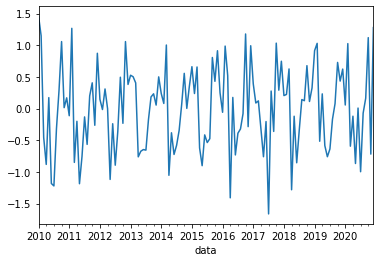

In [50]:
# Visualizando os resíduos
residuos_arma_1_1.plot()
plt.show()

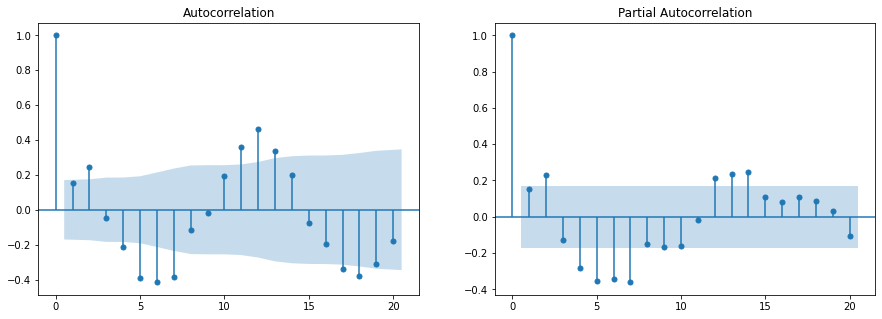

In [52]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_arma_1_1, lags=20, ax=ax[0])
plot_pacf(residuos_arma_1_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

C:\Users\roger\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


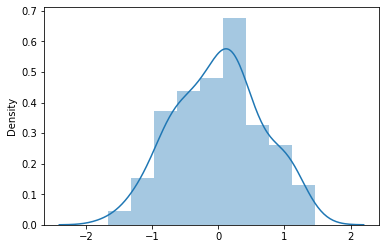

In [55]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_arma_1_1);

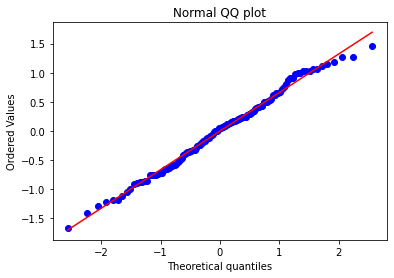

In [56]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_arma_1_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [57]:
# Testando a normalidade dos resíduos
# Ho = distribuição normal p > 0,05
# Ha = distribuição não normal p <= 0,05

e, p = stats.shapiro(residuos_arma_1_1)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9906249642372131
p-valor: 0.5199275016784668


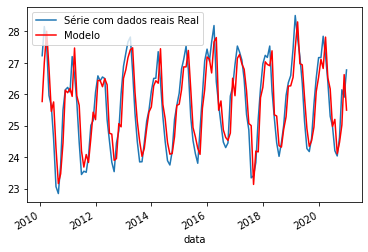

In [59]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_inmet_treino, label='Série com dados reais Real')
resultado_arma_1_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='upper left')
plt.show()

### **Modelo ARIMA(1,1,1)**

In [61]:
# Definindo Ajustando um modelo ARIMA(1,1,1)
modelo_arima_1_1_1 = ARIMA(st_inmet_treino, order = (1,1,1))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_arima_1_1_1 = modelo_arima_1_1_1.fit()

# Pegando os resíduos do modelo
residuos_arima_1_1_1 = resultado_arima_1_1_1.resid

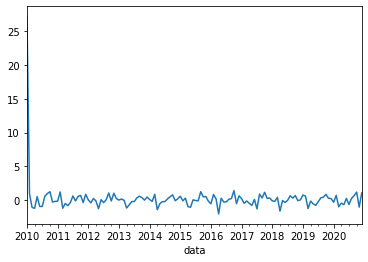

In [62]:
# Visualizando os resíduos
residuos_arima_1_1_1.plot()
plt.show()

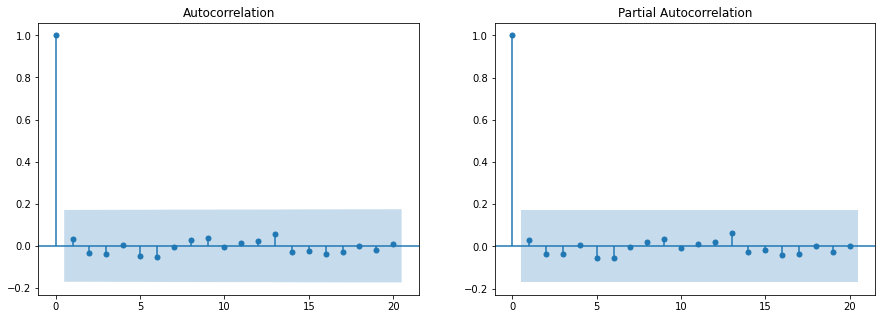

In [64]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_arima_1_1_1, lags=20, ax=ax[0])
plot_pacf(residuos_arima_1_1_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

C:\Users\roger\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


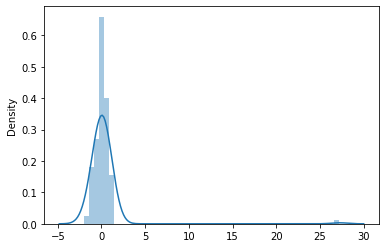

In [65]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_arima_1_1_1);

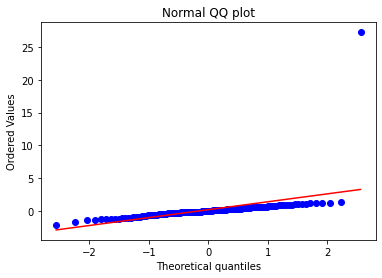

In [66]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_arima_1_1_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

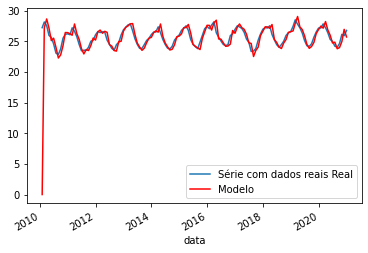

In [67]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_inmet_treino, label='Série com dados reais Real')
resultado_arima_1_1_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='best')
plt.show()

### **Modelo ARIMA(1,0,1)(1,0,1)**

Um modelo ARIMA (p,d,q) com o grau de diferenciação igual a zero temos ARIMA(p,0,q) resulta em um modelo Auto regressivo e de média móvel de ordem p,q: ARMA(p,q). Para modelar também a sazonalidade insere os parâmetros (P,D,Q).

In [68]:
# Definindo Ajustando um modelo ARMA(1,0,1) com ajuste sazonal
modelo_arima_1_0_1_1_0_1 = statsmodels.tsa.arima.model.ARIMA(
    st_inmet_treino, 
    order = (1,0,1), 
    seasonal_order = (1, 0, 1, 12)
)

# Ajustando o modelo e guardando os resultado em um objeto
resultado_arma_1_0_1_1_0_1 = modelo_arima_1_0_1_1_0_1.fit()

# Pegando os resíduos do modelo
residuos_arma_1_0_1_1_0_1 = resultado_arma_1_0_1_1_0_1.resid

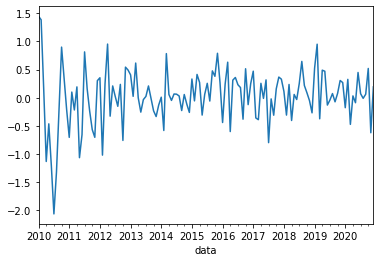

In [69]:
# Visualizando os resíduos
residuos_arma_1_0_1_1_0_1.plot()
plt.show()

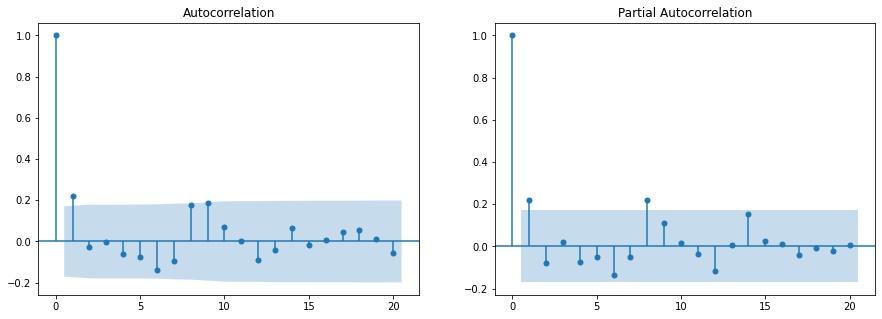

In [70]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_arma_1_0_1_1_0_1, lags=20, ax=ax[0])
plot_pacf(residuos_arma_1_0_1_1_0_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

C:\Users\roger\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


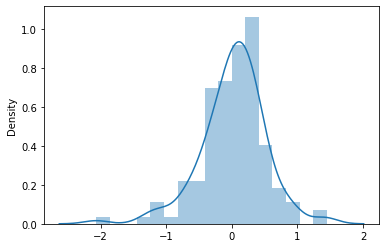

In [71]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_arma_1_0_1_1_0_1);

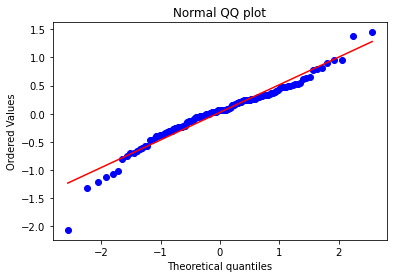

In [72]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_arma_1_0_1_1_0_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

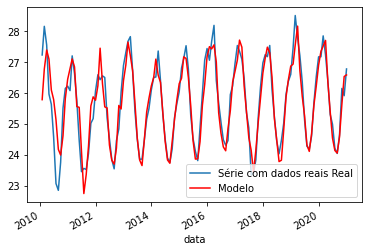

In [73]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_inmet_treino, label='Série com dados reais Real')
resultado_arma_1_0_1_1_0_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='best')
plt.show()

### **Analisando o Critério de Informação de Akaike - AIC**

In [74]:
# Verificando o valor do Critério de Informação de Akaike - AIC
print('ARIMA(1,0,0): AIC = {}'.format(resultado_ar_1.aic))
print('ARIMA(0,0,1): AIC = {}'.format(resultado_ma_1.aic))
print('ARIMA(1,0,1): AIC = {}'.format(resultado_arma_1_1.aic))
print('ARIMA(1,1,1): AIC = {}'.format(resultado_arima_1_1_1.aic))
print('ARIMA(1,0,1)(1,0,1): AIC = {}'.format(resultado_arma_1_0_1_1_0_1.aic))

ARIMA(1,0,0): AIC = 306.94217254456817
ARIMA(0,0,1): AIC = 338.25802230976956
ARIMA(1,0,1): AIC = 267.80903354705174
ARIMA(1,1,1): AIC = 273.1832983069109
ARIMA(1,0,1)(1,0,1): AIC = 161.36248213915746


### **Previsão**

In [75]:
# Predizendo com o modelo ARIMA(1,0,1)(1,0,1)
previsao_arima_1_0_1_1_0_1 = resultado_arma_1_0_1_1_0_1.forecast(12)
previsao_arima_1_0_1_1_0_1

2021-01-31    27.049484
2021-02-28    27.444221
2021-03-31    27.393223
2021-04-30    26.447151
2021-05-31    25.420013
2021-06-30    24.658431
2021-07-31    23.949248
2021-08-31    23.868406
2021-09-30    24.450541
2021-10-31    25.548056
2021-11-30    26.088225
2021-12-31    26.666293
Freq: M, Name: predicted_mean, dtype: float64

In [76]:
# Predizendo com o modelo ARIMA(1,1,1)
previsao_arima_1_1_1= resultado_arima_1_1_1.forecast(12)
previsao_arima_1_1_1

2021-01-31    27.270334
2021-02-28    27.501542
2021-03-31    27.609904
2021-04-30    27.660691
2021-05-31    27.684493
2021-06-30    27.695649
2021-07-31    27.700878
2021-08-31    27.703328
2021-09-30    27.704477
2021-10-31    27.705015
2021-11-30    27.705267
2021-12-31    27.705386
Freq: M, Name: predicted_mean, dtype: float64

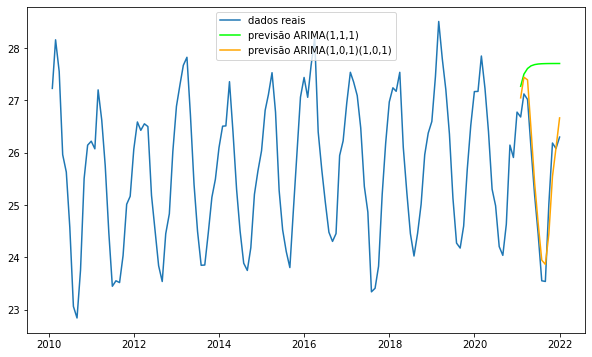

In [77]:
# Plotando a série com dados reais e ajustados pelo modelo
fig, ax = plt.subplots(figsize = (10,6), ncols = 1, nrows = 1)
plt.plot(st_inmet, label='dados reais')
plt.plot(previsao_arima_1_1_1,color='lime', label='previsão ARIMA(1,1,1)')
plt.plot(previsao_arima_1_0_1_1_0_1,color='orange', label='previsão ARIMA(1,0,1)(1,0,1)')
plt.legend(loc='best')
plt.show()

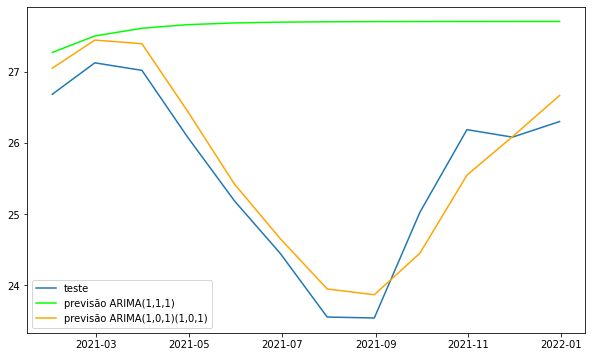

In [78]:
# Plotando a série com dados reais e ajustados pelo modelo
fig, ax = plt.subplots(figsize = (10,6), ncols = 1, nrows = 1)
plt.plot(st_inmet_teste, label='teste')
plt.plot(previsao_arima_1_1_1,color='lime', label='previsão ARIMA(1,1,1)')
plt.plot(previsao_arima_1_0_1_1_0_1,color='orange', label='previsão ARIMA(1,0,1)(1,0,1)')
plt.legend(loc='best')
plt.show()

In [79]:
## Calculando métrica de avaliação do modelo de previsão
## erro médio absoluto (MAE) - meanabs
## raiz do erro quadrático médio (RMSE) - rmse

# Carregando bibliotecas necessárias
from statsmodels.tools.eval_measures import meanabs, rmse

# Calculando as métricas para previsão com ARIMA(1,0,1)(1,0,1)
mae_arima_1_1_1 = meanabs(st_inmet_teste,previsao_arima_1_1_1)
rmse_arima_1_1_1 = rmse(st_inmet_teste,previsao_arima_1_1_1)

# Calculando as métricas para previsão com ARIMA(1,0,1)(1,0,1)
mae_arima_1_0_1_1_0_1 = meanabs(st_inmet_teste,previsao_arima_1_0_1_1_0_1)
rmse_arima_1_0_1_1_0_1 = rmse(st_inmet_teste,previsao_arima_1_0_1_1_0_1)

In [80]:
# Comparando as métricas de avaliação das performances dos modelos de predição
print('Comparando os Erros Médios Absolutos')
print('ARIMA(1,0,1)(1,0,1): MAE = {}'.format(mae_arima_1_0_1_1_0_1))
print('ARIMA(1,1,1): MAE = {}'.format(mae_arima_1_1_1))


print('\n Comparando as Raízes dos Erros Quadráticos Médios')
print('ARIMA(1,0,1)(1,0,1): RMSE = {}'.format(rmse_arima_1_0_1_1_0_1))
print('ARIMA(1,1,1): RMSE = {}'.format(rmse_arima_1_1_1))

Comparando os Erros Médios Absolutos
ARIMA(1,0,1)(1,0,1): MAE = 0.3477496931869262
ARIMA(1,1,1): MAE = 2.0343436584537598

 Comparando as Raízes dos Erros Quadráticos Médios
ARIMA(1,0,1)(1,0,1): RMSE = 0.3807890934855709
ARIMA(1,1,1): RMSE = 2.392831326194679



## **Auto ARIMA**

In [81]:
### AUTOARIMA
modelo_autoarima = auto_arima(
    st_inmet_treino, 
    trace = True, 
    stepwise = False, 
    seasonal=True, 
    start_p=0, 
    start_d=0, 
    start_q=0, 
    start_P=0,
    start_D=0, 
    start_Q=0, 
    max_p=2,
    max_d=1, 
    max_q=2,
    max_P=2,
    max_D=1, 
    max_Q=2, 
    m=12)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=455.800, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=363.348, Time=0.12 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=345.461, Time=0.26 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=286.750, Time=0.42 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=338.258, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=280.520, Time=0.12 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=264.753, Time=0.28 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=216.970, Time=0.34 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=237.972, Time=0.44 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept

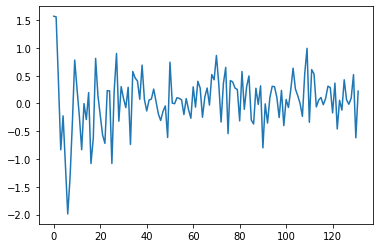

In [82]:
# Ajustando o modelo selecionado aos dados
resultado_autoarima = modelo_autoarima.fit(st_inmet_treino)

# Pegando resíduos do modelo ajustado
residuos_modelo_autoarima = resultado_autoarima.resid

# Visualizando os resíduos
plt.plot(residuos_modelo_autoarima())

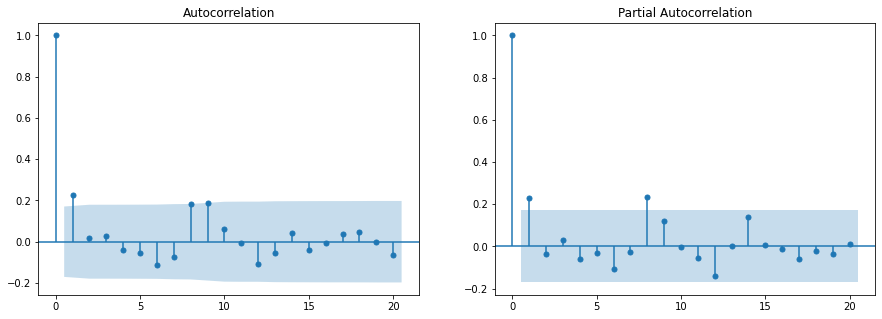

In [83]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_modelo_autoarima(), lags=20, ax=ax[0])
plot_pacf(residuos_modelo_autoarima(), lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

C:\Users\roger\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


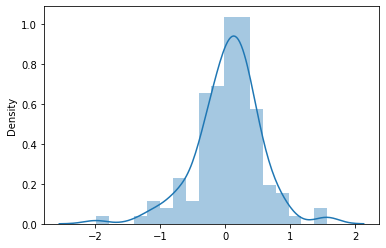

In [84]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_modelo_autoarima());

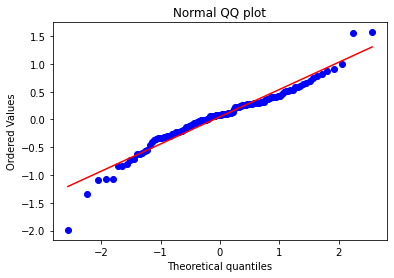

In [85]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_modelo_autoarima(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [86]:
# Verificando o valor do Critério de Informação de Akaike - AIC
resultado_autoarima.aic()

163.65493286790178

In [87]:
# Predizendo com o modelo selecionado pelo autoarima
previsao_autoarima = resultado_autoarima.predict(n_periods=12)
previsao_autoarima

array([27.087423  , 27.48838421, 27.4035803 , 26.46632582, 25.45065203,
       24.70897973, 23.98597773, 23.92319905, 24.48236132, 25.60812324,
       26.12331805, 26.71363617])

In [88]:
# Criando a  Serie temporal de previsao
st_inmet_prev = pd.Series(
    data = previsao_autoarima, 
    index = pd.date_range('2021', periods = 12, freq = 'M')
)

# Espiando o resultado
st_inmet_prev

2021-01-31    27.087423
2021-02-28    27.488384
2021-03-31    27.403580
2021-04-30    26.466326
2021-05-31    25.450652
2021-06-30    24.708980
2021-07-31    23.985978
2021-08-31    23.923199
2021-09-30    24.482361
2021-10-31    25.608123
2021-11-30    26.123318
2021-12-31    26.713636
Freq: M, dtype: float64

In [89]:
# Predizendo dentro da amostra de treino (modelo ajustado aos dados)
st_inmet_modelo = pd.Series(
    data = resultado_autoarima.predict_in_sample(), 
    index = pd.date_range(start='2010', periods = 132, freq = 'M')
)

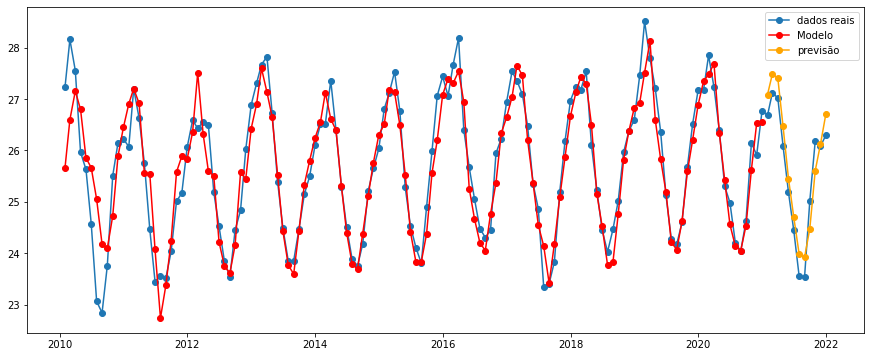

In [91]:
# Plotando a série com dados reais e ajustados pelo modelo
fig, ax = plt.subplots(figsize = (15,6))
plt.plot(st_inmet, label='dados reais', marker = 'o')
plt.plot(st_inmet_modelo,color='red', label='Modelo', marker = 'o')
plt.plot(st_inmet_prev,color='orange', label='previsão', marker = 'o')
plt.legend(loc='best')
plt.show()

In [92]:
## Calculando métrica de avaliação do modelo de previsão
## erro médio absoluto (MAE) - meanabs
## raiz do erro quadrático médio (RMSE) - rmse

# Carregando bibliotecas necessárias
#from statsmodels.tools.eval_measures import meanabs, rmse

# Calculando as métricas para previsão com modelo gerado pelo autorima
mae_autoarima = meanabs(st_inmet_teste,previsao_autoarima)
rmse_autoarima = rmse(st_inmet_teste,previsao_autoarima)

In [93]:
# Comparando as métricas de avaliação das performances dos modelos de predição
print('Comparando os Erros Médios Absolutos')
print('ARIMA(1,0,0)(1,0,2): MAE = {}'.format(mae_autoarima))
print('ARIMA(1,0,1)(1,0,1): MAE = {}'.format(mae_arima_1_0_1_1_0_1))

print('\n Comparando as Raízes dos Erros Quadráticos Médios')
print('ARIMA(1,0,0)(1,0,2): RMSE = {}'.format(rmse_autoarima))
print('ARIMA(1,0,1)(1,0,1): RMSE = {}'.format(rmse_arima_1_0_1_1_0_1))

Comparando os Erros Médios Absolutos
ARIMA(1,0,0)(1,0,2): MAE = 0.37065754520710303
ARIMA(1,0,1)(1,0,1): MAE = 0.3477496931869262

 Comparando as Raízes dos Erros Quadráticos Médios
ARIMA(1,0,0)(1,0,2): RMSE = 0.3936609438587342
ARIMA(1,0,1)(1,0,1): RMSE = 0.3807890934855709
